---

# Patuli (C23-PS037) - Bangkit 2023 Capstone Project

---

## [**Words**] Model Training

---

**Author:** Ammar Sufyan, Fauzan Farhan Antoro, Belvin Shandy Aurora

**Github:** https://github.com/Patuli-Pahlawan-Tuli/Patuli-ML

# 1.&nbsp;Gather and Label Training Images

We first collected the Bisindo sign language dataset. 
*   For the alphabetical (A-Z) dataset we took from [here](https://www.kaggle.com/datasets/nando645/bisindo2).
*   For the number and word datasets, we created our own by taking a photo of ourselves.

Next, after we finished collecting the dataset, we performed labeling using [label-studio](https://github.com/heartexlabs/label-studio).

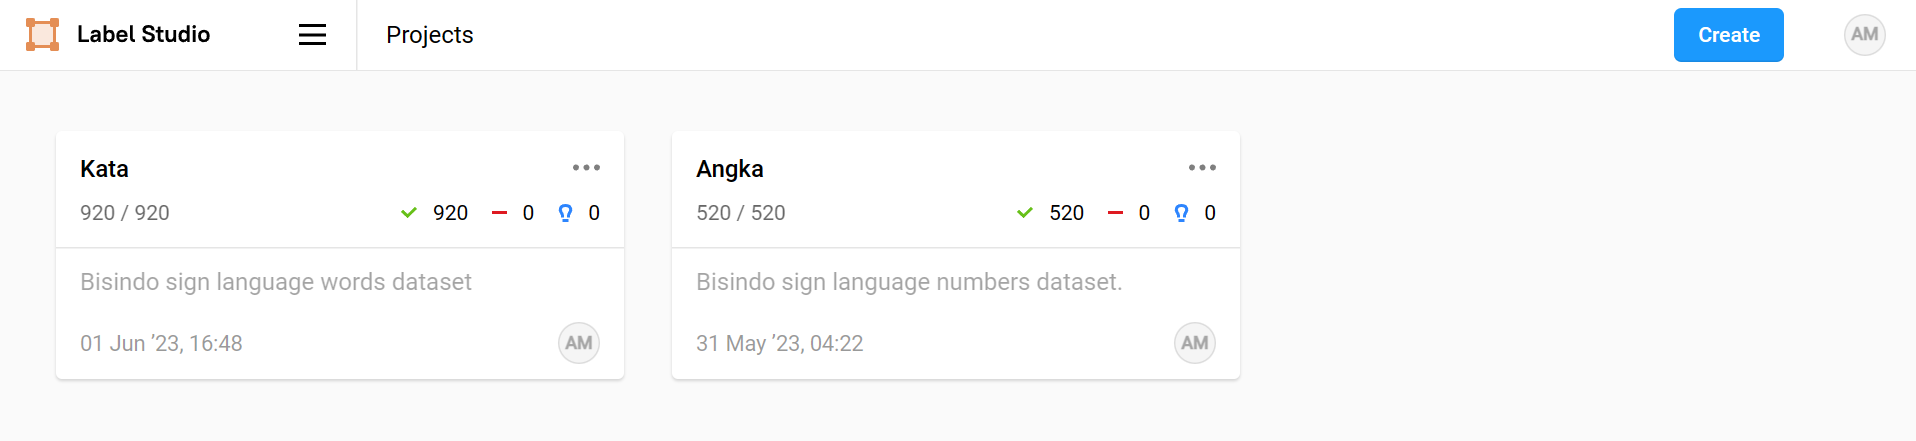

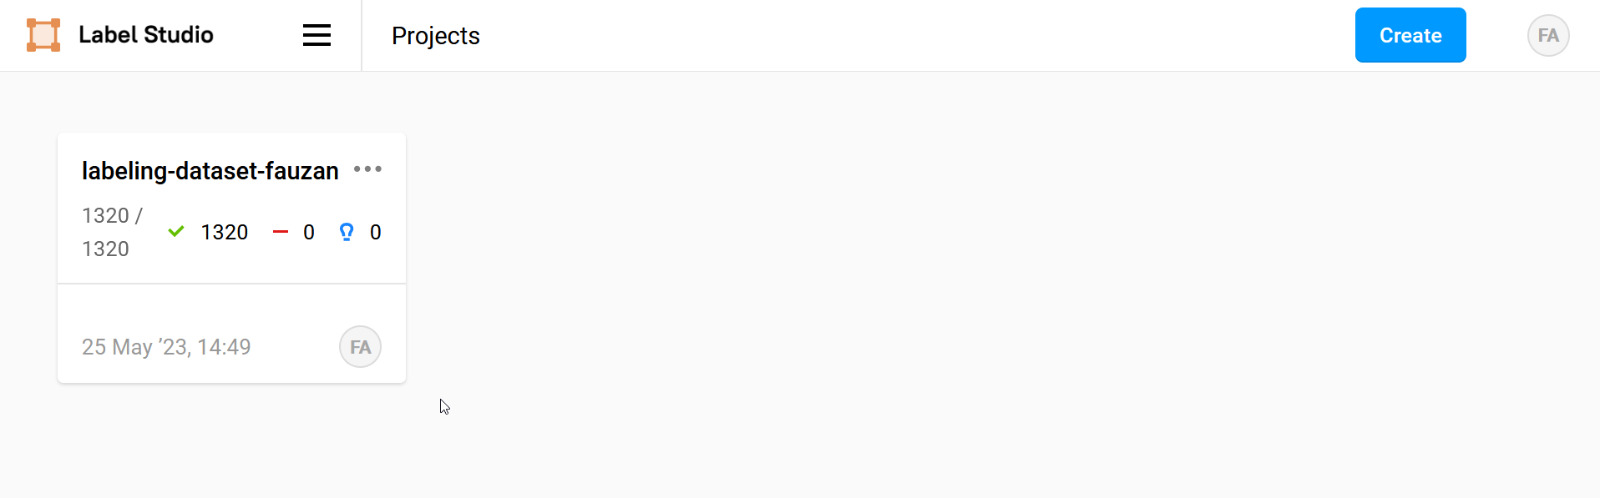

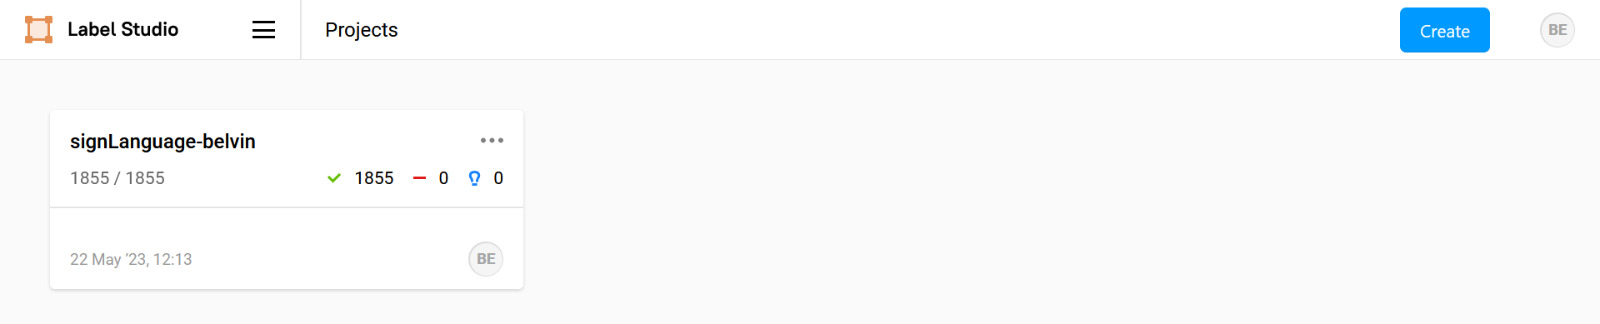

# 2.&nbsp;Install TensorFlow Object Detection Dependencies

In [1]:
!pip install tensorflow==2.8.0
# !sudo apt install protobuf-compiler

In [2]:
!pip install protobuf==3.20.*

In [3]:
import tensorflow as tf

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


2023-06-06 16:48:09.908412: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-06 16:48:10.099096: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-06 16:48:10.133223: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-06 16:48:10.133975: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built witho

In [4]:
# Clone the tensorflow models repository from GitHub
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3851, done.
remote: Counting objects: 100% (3851/3851), done.
remote: Compressing objects: 100% (2959/2959), done.
remote: Total 3851 (delta 1114), reused 1960 (delta 841), pack-reused 0
Receiving objects: 100% (3851/3851), 49.59 MiB | 11.55 MiB/s, done.
Resolving deltas: 100% (1114/1114), done.


In [5]:
%cd models/research/
!protoc object_detection/protos/*.proto --python_out=.
%cd ../..

/home/ammar/localtraining/V1/Kata/models/research
/home/ammar/localtraining/V1/Kata


In [6]:
# Modify setup.py file to install the tf-models-official repository targeted at TF v2.8.0
import re
with open('models/research/object_detection/packages/tf2/setup.py') as f:
    s = f.read()

with open('models/research/setup.py', 'w') as f:
    # Set fine_tune_checkpoint path
    s = re.sub('tf-models-official>=2.5.1',
               'tf-models-official==2.8.0', s)
    f.write(s)

In [7]:
# Install the Object Detection API
!pip install models/research/

Processing ./models/research
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1697018 sha256=5fabb11d8417fcac2f46b65f3943e89904fb03507f0b8a8ee363d551a373dd1f
  Stored in directory: /tmp/pip-ephem-wheel-cache-xywyilct/wheels/14/01/af/32a43ab31e1b8edc7ea732a3de1e9995441dad73dd6173caba
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


In [8]:
# Run Model Builder Test file, just to verify everything's working properly
!python3 models/research/object_detection/builders/model_builder_tf2_test.py

/home/ammar/.local/lib/python3.8/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/home/ammar/.local/lib/python3.8/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/home/ammar/.local/lib/python3.8/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutexC1Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/home/ammar/.local/lib/python3.8/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/home/ammar/.local/lib/python3.8/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/home/ammar/.local/lib/python3.8/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZNK10tensorflow4data11DatasetBase8FinalizeEPNS_15OpKerne

# 3.&nbsp;Preprocessing Data

We performed data preprocessing using the [Roboflow](https://roboflow.com/) platform.

## 3.1&nbsp;Splitting Data

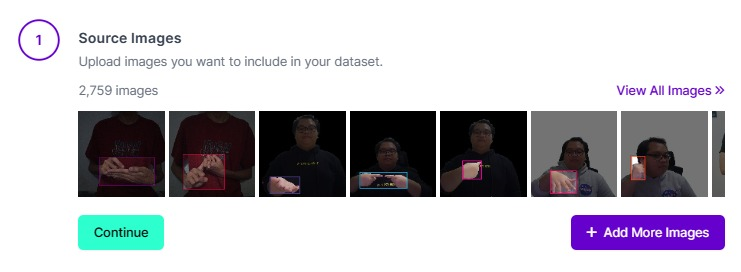

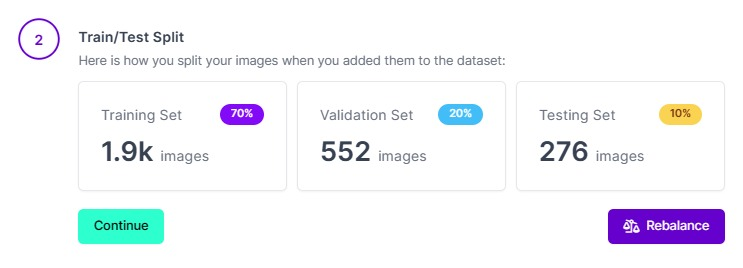

## 3.2&nbsp;Resizing and Augmenting Data

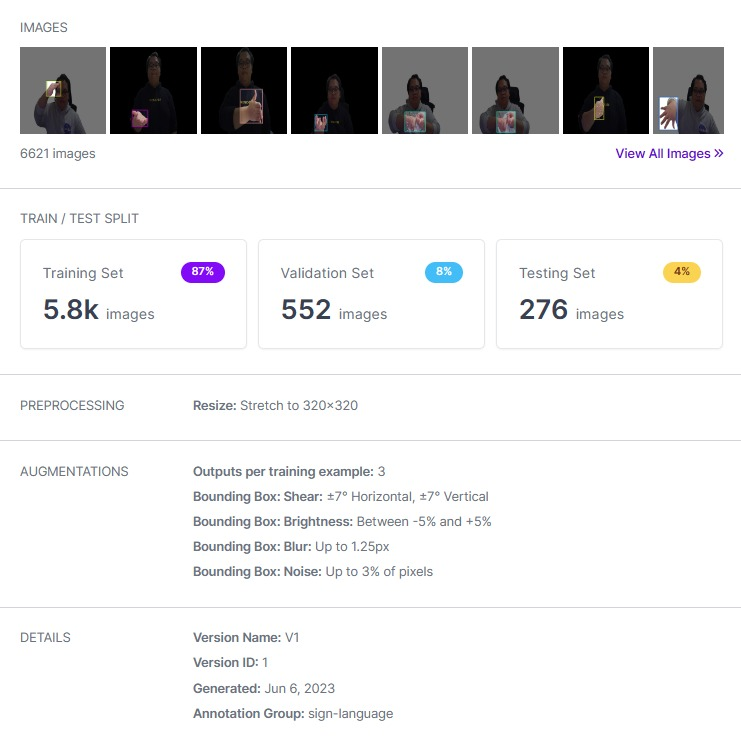

## 3.3&nbsp;Download the Data and Convert to TFRecord

In [9]:
# Install Roboflow library to download the dataset
!pip install roboflow

In [10]:
# install the dotenv to get the key
!pip install python-dotenv

In [11]:
import os
from dotenv import load_dotenv

load_dotenv()
api_key=os.getenv("api_key_angka_kata") 

In [12]:
# Download the dataset
from roboflow import Roboflow
rf = Roboflow(api_key=api_key, model_format="voc")
dataset = rf.workspace().project("patuli-words-dataset").version(1).download(location="images")

loading Roboflow workspace...
loading Roboflow project...
Exporting format voc in progress : 85.0%
Version export complete for voc format


Extracting Dataset Version Zip to images in voc:: 100%|██████████| 13247/13247 [00:00<00:00, 29978.03it/s]


In [13]:
# Download data conversion scripts
!wget https://raw.githubusercontent.com/Patuli-Pahlawan-Tuli/Patuli-ML/main/utils/create_csv_modified.py
!wget https://raw.githubusercontent.com/Patuli-Pahlawan-Tuli/Patuli-ML/main/utils/create_tfrecord.py

--2023-06-06 16:51:24--  https://raw.githubusercontent.com/Patuli-Pahlawan-Tuli/Patuli-ML/main/utils/create_csv_modified.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1416 (1.4K) [text/plain]
Saving to: ‘create_csv_modified.py’

create_csv_modified 100%[===================>]   1.38K  --.-KB/s    in 0s      

2023-06-06 16:51:24 (57.6 MB/s) - ‘create_csv_modified.py’ saved [1416/1416]

--2023-06-06 16:51:24--  https://raw.githubusercontent.com/Patuli-Pahlawan-Tuli/Patuli-ML/main/utils/create_tfrecord.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting re

In [14]:
# Create CSV data files and TFRecord files
!python3 create_csv_modified.py
!python3 create_tfrecord.py --csv_input=images/train_labels.csv --labelmap=classes.txt --image_dir=images/train --output_path=train.tfrecord
!python3 create_tfrecord.py --csv_input=images/valid_labels.csv --labelmap=classes.txt --image_dir=images/valid --output_path=val.tfrecord

Successfully converted xml to csv.
Successfully converted xml to csv.
2023-06-06 16:51:46.028715: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-06 16:51:46.033164: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-06 16:51:46.033427: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
Traceback (most recent call last):
  File "create_tfrecord.py", line 120, in <module>
    tf.app.run()
  File "/home/ammar/.local/lib/python3.8/site-packages/tensorflow/python/platform/app.py", line 36, in run
    _run(main=main, argv=argv, flags_parser=_

In [15]:
train_record_fname = 'train.tfrecord'
val_record_fname = 'val.tfrecord'
label_map_pbtxt_fname = 'labelmap.pbtxt'

# 4.&nbsp;Setup Training

In [16]:
#Models available in the TF2 object detection zoo
chosen_model = 'ssd-mobilenet-v2-fpnlite-320'

MODELS_CONFIG = {
      'ssd-mobilenet-v2-fpnlite-320': {
        'model_name': 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8',
        'base_pipeline_file': 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config',
        'pretrained_checkpoint': 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz',
    }
}

model_name = MODELS_CONFIG[chosen_model]['model_name']
pretrained_checkpoint = MODELS_CONFIG[chosen_model]['pretrained_checkpoint']
base_pipeline_file = MODELS_CONFIG[chosen_model]['base_pipeline_file']

In [17]:
# Create "config" folder for holding pre-trained weights and configuration files
%mkdir models/config/
%cd models/config/

# Download pre-trained model weights
import tarfile
download_tar = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/' + pretrained_checkpoint
!wget {download_tar}
tar = tarfile.open(pretrained_checkpoint)
tar.extractall()
tar.close()

# Download training configuration file for model
download_config = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/' + base_pipeline_file
!wget {download_config}

%cd ../..

/home/ammar/localtraining/V1/Kata/models/config
--2023-06-06 16:52:05--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.10.128, 2404:6800:4003:c02::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.10.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  5.88MB/s    in 3.3s    

2023-06-06 16:52:09 (5.88 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

--2023-06-06 16:52:10--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108

In [18]:
# Set training parameters for the model
num_steps = 40000
batch_size = 16

In [19]:
# Set file locations and get number of classes for config file
pipeline_fname = 'models/config/' + base_pipeline_file
fine_tune_checkpoint = 'models/config/' + model_name + '/checkpoint/ckpt-0'

def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())
num_classes = get_num_classes(label_map_pbtxt_fname)
print('Total classes:', num_classes)

NotFoundError: labelmap.pbtxt; No such file or directory

In [ ]:
# Create custom configuration file by writing the dataset, model checkpoint, and training parameters into the base pipeline file
import re

print('writing custom configuration file')

with open(pipeline_fname) as f:
    s = f.read()

with open('models/config/pipeline_file.config', 'w') as f:
    
    # Set fine_tune_checkpoint path
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    
    # Set tfrecord files for train and test datasets
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/train)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/val)(.*?")', 'input_path: "{}"'.format(val_record_fname), s)

    # Set label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Set batch_size
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)

    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)
    
    # Set number of classes num_classes
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)

    # Change fine-tune checkpoint type from "classification" to "detection"
    s = re.sub(
        'fine_tune_checkpoint_type: "classification"', 'fine_tune_checkpoint_type: "{}"'.format('detection'), s)
    
    # Reduce learning rate (because it's too high in the default config file)
    s = re.sub('learning_rate_base: .8',
               'learning_rate_base: .08', s)
      
    s = re.sub('warmup_learning_rate: 0.13333',
               'warmup_learning_rate: .026666', s)

    f.write(s)

In [ ]:
# Set the path to the custom config file and the directory to store training checkpoints in
pipeline_file = 'models/config/pipeline_file.config'
model_dir = 'training'

# 5.&nbsp;Start Training

In [ ]:
# Run training!
!python3 models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={pipeline_file} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --sample_1_of_n_eval_examples=1

# 6.&nbsp;Convert Model to TensorFlow Lite

In [ ]:
# Make a directory to store the trained TFLite model
!mkdir custom_model_lite
output_directory = 'custom_model_lite'

# Path to training directory (the conversion script automatically chooses the highest checkpoint file)
last_model_path = 'training'

!python3 models/research/object_detection/export_tflite_graph_tf2.py \
    --trained_checkpoint_dir {last_model_path} \
    --output_directory {output_directory} \
    --pipeline_config_path {pipeline_file}


In [ ]:
# Convert exported graph file into TFLite model file
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model('custom_model_lite/saved_model')
tflite_model = converter.convert()

with open('custom_model_lite/detect.tflite', 'wb') as f:
  f.write(tflite_model)

## 6.1&nbsp;Write Metadata to TensorFlow Lite

In [ ]:
!pip install tflite-support-nightly

In [ ]:
from tflite_support.metadata_writers import object_detector
from tflite_support.metadata_writers import metadata_info
from tflite_support.metadata_writers import writer_utils
from tflite_support import metadata_schema_py_generated as _metadata_fb

In [ ]:
ObjectDetectorWriter = object_detector.MetadataWriter
_MODEL_PATH = "custom_model_lite/detect.tflite"
# Task Library expects label files that are in the same format as the one below.
_LABEL_FILE = "classes.txt"
_SAVE_TO_PATH = "model_metadata.tflite"
# Normalization parameters is required when reprocessing the image. It is
# optional if the image pixel values are in range of [0, 255] and the input
# tensor is quantized to uint8. See the introduction for normalization and
# quantization parameters below for more details.
# https://www.tensorflow.org/lite/models/convert/metadata#normalization_and_quantization_parameters)
_INPUT_NORM_MEAN = 127.5
_INPUT_NORM_STD = 127.5

# Create the metadata writer.
writer = ObjectDetectorWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), [_INPUT_NORM_MEAN], [_INPUT_NORM_STD],
    [_LABEL_FILE])

# Verify the metadata generated by metadata writer.
print(writer.get_metadata_json())

# Populate the metadata into the model.
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)

In [ ]:
from tflite_support import metadata

displayer = metadata.MetadataDisplayer.with_model_file("model_metadata.tflite")
print("Metadata populated:")
print(displayer.get_metadata_json())

print("Associated file(s) populated:")
for file_name in displayer.get_packed_associated_file_list():
  print("file name: ", file_name)
  print("file content:")
  print(displayer.get_associated_file_buffer(file_name))

# 7.&nbsp;Testing the Model

## 7.1&nbsp;Inference Test Images

In [ ]:
# Script to run custom TFLite model on test images to detect objects
# Source: https://github.com/EdjeElectronics/TensorFlow-Lite-Object-Detection-on-Android-and-Raspberry-Pi/blob/master/TFLite_detection_image.py

# Import packages
import os
import cv2
import numpy as np
import sys
import glob
import random
import importlib.util
from tensorflow.lite.python.interpreter import Interpreter
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### Define function for inferencing with TFLite model and displaying results

def tflite_detect_images(modelpath, imgpath, lblpath, min_conf, num_test_images, savepath='results', txt_only=False):

  # Grab filenames of all images in test folder
  images = glob.glob(imgpath + '/*.jpg') + glob.glob(imgpath + '/*.JPG') + glob.glob(imgpath + '/*.png') + glob.glob(imgpath + '/*.bmp') + glob.glob(imgpath + '/*.jpeg') 

  # Load the label map into memory
  with open(lblpath, 'r') as f:
      labels = [line.strip() for line in f.readlines()]

  # Load the Tensorflow Lite model into memory
  interpreter = Interpreter(model_path=modelpath)
  interpreter.allocate_tensors()

  # Get model details
  input_details = interpreter.get_input_details()
  output_details = interpreter.get_output_details()
  height = input_details[0]['shape'][1]
  width = input_details[0]['shape'][2]

  float_input = (input_details[0]['dtype'] == np.float32)

  input_mean = 127.5
  input_std = 127.5

  # Randomly select test images
  images_to_test = random.sample(images, num_test_images)

  # Loop over every image and perform detection
  for image_path in images_to_test:

      # Load image and resize to expected shape [1xHxWx3]
      image = cv2.imread(image_path)
      image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      imH, imW, _ = image.shape 
      image_resized = cv2.resize(image_rgb, (width, height))
      input_data = np.expand_dims(image_resized, axis=0)

      # Normalize pixel values if using a floating model (i.e. if model is non-quantized)
      if float_input:
          input_data = (np.float32(input_data) - input_mean) / input_std

      # Perform the actual detection by running the model with the image as input
      interpreter.set_tensor(input_details[0]['index'],input_data)
      interpreter.invoke()

      # Retrieve detection results
      boxes = interpreter.get_tensor(output_details[1]['index'])[0] # Bounding box coordinates of detected objects
      classes = interpreter.get_tensor(output_details[3]['index'])[0] # Class index of detected objects
      scores = interpreter.get_tensor(output_details[0]['index'])[0] # Confidence of detected objects

      detections = []

      # Loop over all detections and draw detection box if confidence is above minimum threshold
      for i in range(len(scores)):
          if ((scores[i] > min_conf) and (scores[i] <= 1.0)):

              # Get bounding box coordinates and draw box
              # Interpreter can return coordinates that are outside of image dimensions, need to force them to be within image using max() and min()
              ymin = int(max(1,(boxes[i][0] * imH)))
              xmin = int(max(1,(boxes[i][1] * imW)))
              ymax = int(min(imH,(boxes[i][2] * imH)))
              xmax = int(min(imW,(boxes[i][3] * imW)))
              
              cv2.rectangle(image, (xmin,ymin), (xmax,ymax), (10, 255, 0), 2)

              # Draw label
              object_name = labels[int(classes[i])] # Look up object name from "labels" array using class index
              label = '%s: %d%%' % (object_name, int(scores[i]*100)) # Example: 'person: 72%'
              labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2) # Get font size
              label_ymin = max(ymin, labelSize[1] + 10) # Make sure not to draw label too close to top of window
              cv2.rectangle(image, (xmin, label_ymin-labelSize[1]-10), (xmin+labelSize[0], label_ymin+baseLine-10), (255, 255, 255), cv2.FILLED) # Draw white box to put label text in
              cv2.putText(image, label, (xmin, label_ymin-7), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2) # Draw label text

              detections.append([object_name, scores[i], xmin, ymin, xmax, ymax])

      
      # All the results have been drawn on the image, now display the image
      if txt_only == False: # "text_only" controls whether we want to display the image results or just save them in .txt files
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(12,16))
        plt.imshow(image)
        plt.show()
      
      # Save detection results in .txt files (for calculating mAP)
      elif txt_only == True:

        # Get filenames and paths
        image_fn = os.path.basename(image_path)      
        base_fn, ext = os.path.splitext(image_fn)
        txt_result_fn = base_fn +'.txt'
        txt_savepath = os.path.join(savepath, txt_result_fn)

        # Write results to text file
        # (Using format defined by https://github.com/Cartucho/mAP, which will make it easy to calculate mAP)
        with open(txt_savepath,'w') as f:
            for detection in detections:
                f.write('%s %.4f %d %d %d %d\n' % (detection[0], detection[1], detection[2], detection[3], detection[4], detection[5]))

  return

In [ ]:
# Set up variables for running user's model
PATH_TO_IMAGES='images/test'   # Path to test images folder
PATH_TO_MODEL='model_metadata.tflite'   # Path to .tflite model file
PATH_TO_LABELS='classes.txt'   # Path to labelmap.txt file
min_conf_threshold=0.8   # Confidence threshold (try changing this to 0.01 if you don't see any detection results)
images_to_test=10 # Number of images to run detection on

# Run inferencing function!
tflite_detect_images(PATH_TO_MODEL, PATH_TO_IMAGES, PATH_TO_LABELS, min_conf_threshold, images_to_test)

## 7.2.&nbsp;Calculate mAP

In [ ]:
!git clone https://github.com/Cartucho/mAP mAP
%cd mAP
!rm input/detection-results/* 
!rm input/ground-truth/* 
!rm input/images-optional/* 
!wget https://raw.githubusercontent.com/Patuli-Pahlawan-Tuli/Patuli-ML/main/utils/calculate_map_cartucho_modified.py
%cd ..

In [ ]:
!cp images/test/* mAP/input/images-optional # Copy images and xml files
!mv mAP/input/images-optional/*.xml mAP/input/ground-truth/  # Move xml files to the appropriate folder

In [ ]:
!python3 mAP/scripts/extra/convert_gt_xml.py

In [ ]:
# Set up variables for running inference, this time to get detection results saved as .txt files
PATH_TO_IMAGES='images/test'   # Path to test images folder
PATH_TO_MODEL='model_metadata.tflite'   # Path to .tflite model file
PATH_TO_LABELS='classes.txt'   # Path to labelmap.txt file
PATH_TO_RESULTS='mAP/input/detection-results' # Folder to save detection results in
min_conf_threshold=0.8 # Confidence threshold

# Use all the images in the test folder
image_list = glob.glob(PATH_TO_IMAGES + '/*.jpg') + glob.glob(PATH_TO_IMAGES + '/*.JPG') + glob.glob(PATH_TO_IMAGES + '/*.png') + glob.glob(PATH_TO_IMAGES + '/*.bmp') + glob.glob(PATH_TO_IMAGES + '/*.jpeg')
images_to_test = min(500, len(image_list)) # If there are more than 500 images in the folder, just use 500

# Tell function to just save results and not display images
txt_only = True

# Run inferencing function!
print('Starting inference on %d images...' % images_to_test)
tflite_detect_images(PATH_TO_MODEL, PATH_TO_IMAGES, PATH_TO_LABELS, min_conf_threshold, images_to_test, PATH_TO_RESULTS, txt_only)
print('Finished inferencing!')

In [ ]:
#if there a space in classes, ex: Terima Kasih
%cd mAP/
!wget https://raw.githubusercontent.com/Patuli-Pahlawan-Tuli/Patuli-ML/main/utils/remove_spaces_modified.py
%cd ..
!python3 mAP/remove_spaces_modified.py

In [ ]:
!cp classes.txt mAP/

In [ ]:
%cd mAP/
!python3 scripts/extra/intersect-gt-and-dr.py
!python3 calculate_map_cartucho_modified.py --labels=classes.txt
%cd ..

# 8.&nbsp;Post-Training Quantization

In [ ]:
# Get list of all images in train directory
image_path = 'images/train'

jpg_file_list = glob.glob(image_path + '/*.jpg')
JPG_file_list = glob.glob(image_path + '/*.JPG')
png_file_list = glob.glob(image_path + '/*.png')
bmp_file_list = glob.glob(image_path + '/*.bmp')
jpeg_file_list = glob.glob(image_path + '/*.jpeg')

quant_image_list = jpg_file_list + JPG_file_list + png_file_list + bmp_file_list + jpeg_file_list

In [ ]:
# A generator that provides a representative dataset
# Code modified from https://colab.research.google.com/github/google-coral/tutorials/blob/master/retrain_classification_ptq_tf2.ipynb

# First, get input details for model so we know how to preprocess images
interpreter = Interpreter(model_path=PATH_TO_MODEL)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
height = input_details[0]['shape'][1]
width = input_details[0]['shape'][2]

import random

def representative_data_gen():
  dataset_list = quant_image_list
  quant_num = 300
  for i in range(quant_num):
    pick_me = random.choice(dataset_list)
    image = tf.io.read_file(pick_me)

    if pick_me.endswith('.jpg') or pick_me.endswith('.JPG') or pick_me.endswith('.jpeg'):
      image = tf.io.decode_jpeg(image, channels=3)
    elif pick_me.endswith('.png'):
      image = tf.io.decode_png(image, channels=3)
    elif pick_me.endswith('.bmp'):
      image = tf.io.decode_bmp(image, channels=3)

    image = tf.image.resize(image, [width, height])
    image = tf.cast(image / 255., tf.float32)
    image = tf.expand_dims(image, 0)
    yield [image]

In [ ]:
# Initialize converter module
converter = tf.lite.TFLiteConverter.from_saved_model('custom_model_lite/saved_model')

# This enables quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# This sets the representative dataset for quantization
converter.representative_dataset = representative_data_gen
# This ensures that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# For full integer quantization, though supported types defaults to int8 only, we explicitly declare it for clarity.
converter.target_spec.supported_types = [tf.int8]
# These set the input tensors to uint8 and output tensors to float32
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.float32
tflite_model = converter.convert()

with open('custom_model_lite/detect_quant.tflite', 'wb') as f:
  f.write(tflite_model)

## 8.1&nbsp;Write Metadata to TensorFlow Lite

In [ ]:
from tflite_support.metadata_writers import object_detector
from tflite_support.metadata_writers import metadata_info
from tflite_support.metadata_writers import writer_utils
from tflite_support import metadata_schema_py_generated as _metadata_fb

In [ ]:
ObjectDetectorWriter = object_detector.MetadataWriter
_MODEL_PATH = "custom_model_lite/detect_quant.tflite"
# Task Library expects label files that are in the same format as the one below.
_LABEL_FILE = "classes.txt"
_SAVE_TO_PATH = "model_metadata_quant.tflite"
# Normalization parameters is required when reprocessing the image. It is
# optional if the image pixel values are in range of [0, 255] and the input
# tensor is quantized to uint8. See the introduction for normalization and
# quantization parameters below for more details.
# https://www.tensorflow.org/lite/models/convert/metadata#normalization_and_quantization_parameters)
_INPUT_NORM_MEAN = 127.5
_INPUT_NORM_STD = 127.5

# Create the metadata writer.
writer = ObjectDetectorWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), [_INPUT_NORM_MEAN], [_INPUT_NORM_STD],
    [_LABEL_FILE])

# Verify the metadata generated by metadata writer.
print(writer.get_metadata_json())

# Populate the metadata into the model.
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)

In [ ]:
from tflite_support import metadata

displayer = metadata.MetadataDisplayer.with_model_file("model_metadata.tflite")
print("Metadata populated:")
print(displayer.get_metadata_json())

print("Associated file(s) populated:")
for file_name in displayer.get_packed_associated_file_list():
  print("file name: ", file_name)
  print("file content:")
  print(displayer.get_associated_file_buffer(file_name))